# VGG16

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
from random import randint
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

## Data Preparation

The images included in the data/cats-and-dogs directory are a random subset of the full cat and dog data set from the following Kaggle competition: http://www.kaggle.com/dogs-vs-cats/data

In [2]:
train_n=6000
valid_n=1000
test_n=3000

In [3]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\dog') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\train\\dog')
    
    for i in random.sample(glob.glob('dog*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\dog')  
os.chdir('../../')

In [4]:
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\cat') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\train\\cat')
    
    for i in random.sample(glob.glob('cat*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\cat')  
os.chdir('../../')

In [5]:
# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\dog') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\valid\\dog')
    
    for i in random.sample(glob.glob('dog*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\dog')  
os.chdir('../../')

In [6]:
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\cat') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\valid\\cat')
    
    for i in random.sample(glob.glob('cat*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\cat')  
os.chdir('../../')

In [7]:
# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\dog') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\test\\dog')
    
    for i in random.sample(glob.glob('dog*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\dog')  
os.chdir('../../')

In [8]:
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\cat') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\test\\cat')
    
    for i in random.sample(glob.glob('cat*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\cat')  
os.chdir('../../')

In [9]:
train_path = 'C:\\Users\\רועי\\\data\\dogs-vs-cats\\train'
valid_path = 'C:\\Users\\רועי\\\data\\dogs-vs-cats\\valid'
test_path = 'C:\\Users\\רועי\\\data\\dogs-vs-cats\\test'

# VGG16

In [36]:
# Download model - Internet connection needed
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [37]:
pysical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(pysical_devices))
# tf.config.experimental.set_memory_growth(pysical_devices[0], True)

Num GPUs Available:  0


In [38]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)  \
.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path,  target_size=(224,224), classes=['cat','dog'], batch_size=10, shuffle=False)

Found 12000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [39]:
assert train_batches.n == train_n*2
assert valid_batches.n == valid_n*2
assert test_batches.n == test_n*2
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [40]:
imgs, labels = next(train_batches)

In [41]:
# plot images in the form of a 1 by 10 grid and resize img to 20x20
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

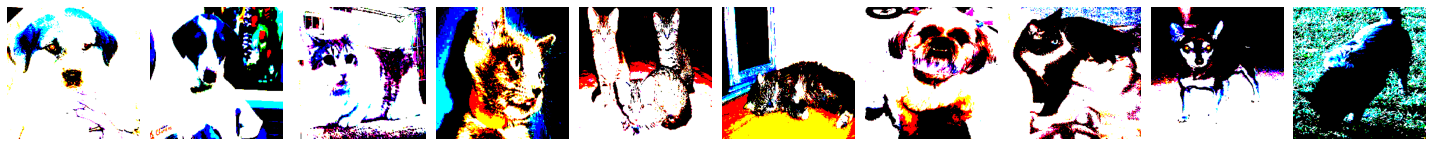

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [42]:
plotImages(imgs)
print(labels)

# Build Fine-tuned VGG16 model

In [43]:
# Download model - Internet connection needed
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [44]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [45]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [46]:
params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544

In [47]:
type(vgg16_model)

tensorflow.python.keras.engine.training.Model

In [48]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [50]:
params = count_params(model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 134260544

In [51]:
for layer in model.layers:
    layer.trainable = False

In [52]:
model.add(Dense(units=2, activation='softmax'))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [54]:
params = count_params(model)
assert params['non_trainable_params'] == 134260544
assert params['trainable_params'] == 8194

# Train the fine-tuned VGG16 model

In [55]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
X_train = train_batches
y_train = train_batches.classes
X_valid = valid_batches
y_valid = valid_batches.classes

In [57]:
model.fit(x=X_train, validation_data=X_valid, epochs=10, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1200 steps, validate for 200 steps
Epoch 1/10
1200/1200 - 2415s - loss: 0.0825 - accuracy: 0.9667 - val_loss: 0.0628 - val_accuracy: 0.9770
Epoch 2/10
1200/1200 - 2412s - loss: 0.0401 - accuracy: 0.9843 - val_loss: 0.0579 - val_accuracy: 0.9800
Epoch 3/10
1200/1200 - 2404s - loss: 0.0315 - accuracy: 0.9877 - val_loss: 0.0620 - val_accuracy: 0.9800
Epoch 4/10
1200/1200 - 2416s - loss: 0.0252 - accuracy: 0.9909 - val_loss: 0.0609 - val_accuracy: 0.9805
Epoch 5/10
1200/1200 - 2420s - loss: 0.0198 - accuracy: 0.9927 - val_loss: 0.0642 - val_accuracy: 0.9790
Epoch 6/10
1200/1200 - 2425s - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0679 - val_accuracy: 0.9785
Epoch 7/10
1200/1200 - 2433s - loss: 0.0130 - accuracy: 0.9967 - val_loss: 0.0716 - val_accuracy: 0.9775
Epoch 8/10
1200/1200 - 2426s - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0660 - val_accuracy: 0.9795
Epoch 9/10
1200/1200 - 2442s - loss: 0.0084 - accuracy: 0.9982 - 

# Predict using Fine-tuned VGG16 model

In [58]:
predictions = model.predict(x=X_test, verbose=0)

In [59]:
rounded_predictions = np.argmax(np.round(predictions), axis=-1)  

In [60]:
y_pred = rounded_predictions

# Confusion Matrix

In [61]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [62]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2947   53]
 [  35 2965]]


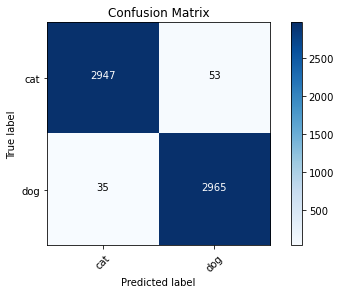

In [63]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [64]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm[0,1]+cm[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm.sum()))

 The result is telling us that we have:  5912 correct predictions.
 The result is telling us that we have:  88 incorrect predictions.
 We have a total predictions of:  6000


# Classification Report

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3000
           1       0.98      0.99      0.99      3000

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



In [66]:
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of the Fine-tuned VGG16 model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("\nWell, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Fine-tuned VGG16 model: 98.53%

Well, you got a classification rate of 98.53%


In [67]:
#calculate Precision
print("Precision of the Fine-tuned VGG16 model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("\nPrecision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Fine-tuned VGG16 model predicted an image is of dog, that image is actually of dog", "{:.2%}".format(metrics.precision_score(y_test, y_pred)) ,"of the time.")

Precision of the Fine-tuned VGG16 model: 98.24%

Precision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Fine-tuned VGG16 model predicted an image is of dog, that image is actually of dog 98.24% of the time.


In [68]:
#calculate Recall
print("Recall of the Fine-tuned VGG16 model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("\nRecall: If there is an image of dog present in the test set, our Fine-tuned VGG16 model can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Recall of the Fine-tuned VGG16 model: 98.83%

Recall: If there is an image of dog present in the test set, our Fine-tuned VGG16 model can identify it 98.83% of the time.


# ROC AUC Curve

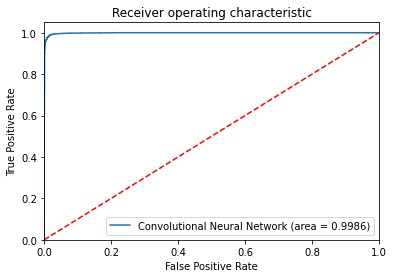

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
vgg16_roc_auc = roc_auc_score(y_test, model.predict(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Convolutional Neural Network (area = %0.4f)' % vgg16_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('VGG16_ROC')
plt.show()

In [102]:
# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\dog')
for i in random.sample(glob.glob('*'), train_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\train\\dog')
os.chdir('../../')

# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\cat')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\cat_set')
for i in random.sample(glob.glob('*'), train_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\train\\cat')
os.chdir('../../')

In [103]:
# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\dog')
for i in random.sample(glob.glob('*'), valid_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\valid\\dog')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\cat')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\cat_set')
for i in random.sample(glob.glob('*'), valid_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\valid\\cat')
os.chdir('../../')

In [104]:
# Delete data from test directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\dog')
for i in random.sample(glob.glob('*'), test_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\test\\dog')
os.chdir('../../')

# Delete data from test directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\cat')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\cat_set')
for i in random.sample(glob.glob('*'), test_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\test\\cat')
os.chdir('../../')